In [20]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [21]:
import pathlib

# Replace 'local_path' with the local directory where you have downloaded and extracted the dataset.
local_path = "dataset"
data_dir = pathlib.Path(local_path)

In [22]:
print(data_dir)

dataset


In [23]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 960 files belonging to 2 classes.
Using 768 files for training.


In [24]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 960 files belonging to 2 classes.
Using 192 files for validation.


In [25]:
class_names = train_ds.class_names
print(class_names)

['no', 'yes']


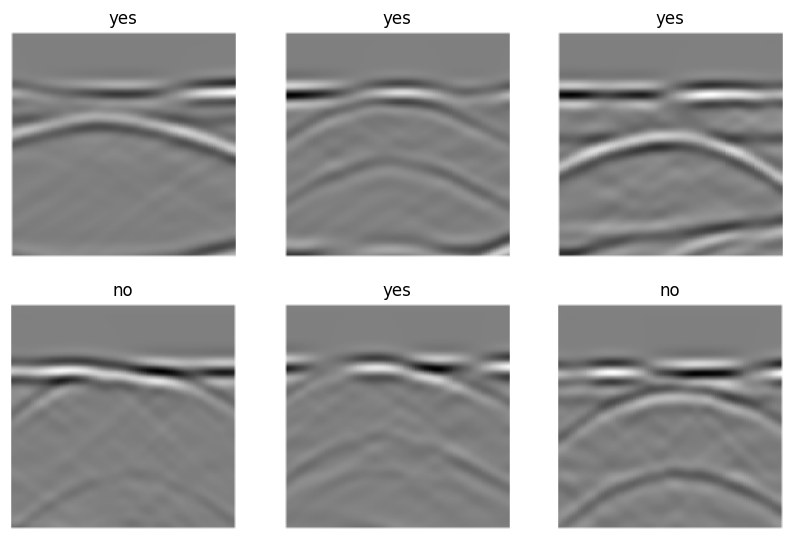

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [27]:
resnet_model = Sequential()

import ssl
ssl._create_default_https_context = ssl._create_unverified_context


pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=2,
                   weights='imagenet')

for layer in pretrained_model.layers[:-2]:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(1024, activation='relu'))
resnet_model.add(Dense(512, activation='sigmoid'))
resnet_model.add(Dense(2, activation='sigmoid'))

In [28]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_8 (ModuleWr  (None, 2048)              0         
 apper)                                                          
                                                                 
 module_wrapper_9 (ModuleWr  (None, 1024)              2098176   
 apper)                                                          
                                                                 
 module_wrapper_10 (ModuleW  (None, 512)               524800    
 rapper)                                                         
                                                                 
 module_wrapper_11 (ModuleW  (None, 2)                 1026      
 rapper)                                              

In [41]:
from keras.optimizers.legacy import Adam

# Define the learning rate
learning_rate = 0.001

# Create the optimizer with the desired learning rate
adam_optimizer = Adam(lr=learning_rate)
resnet_model.compile(optimizer=adam_optimizer, loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [42]:

epochs=18
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
)


Epoch 1/18


24/24 [==============================] - 10s 314ms/step - loss: 1.1021 - accuracy: 0.5625 - val_loss: 0.5684 - val_accuracy: 0.7552
Epoch 2/18
24/24 [==============================] - 8s 291ms/step - loss: 0.5123 - accuracy: 0.7448 - val_loss: 0.4400 - val_accuracy: 0.7708
Epoch 3/18
24/24 [==============================] - 8s 293ms/step - loss: 0.3881 - accuracy: 0.8216 - val_loss: 0.3142 - val_accuracy: 0.8385
Epoch 4/18
24/24 [==============================] - 8s 288ms/step - loss: 0.3665 - accuracy: 0.8268 - val_loss: 0.2801 - val_accuracy: 0.8698
Epoch 5/18
24/24 [==============================] - 8s 291ms/step - loss: 0.2484 - accuracy: 0.9010 - val_loss: 0.2724 - val_accuracy: 0.8802
Epoch 6/18
24/24 [==============================] - 8s 292ms/step - loss: 0.1933 - accuracy: 0.9193 - val_loss: 0.1959 - val_accuracy: 0.9271
Epoch 7/18
24/24 [==============================] - 8s 293ms/step - loss: 0.1677 - accuracy: 0.9336 - val_loss: 0.1572 - val_accuracy: 0.9375
Epoch 8/18
24/24

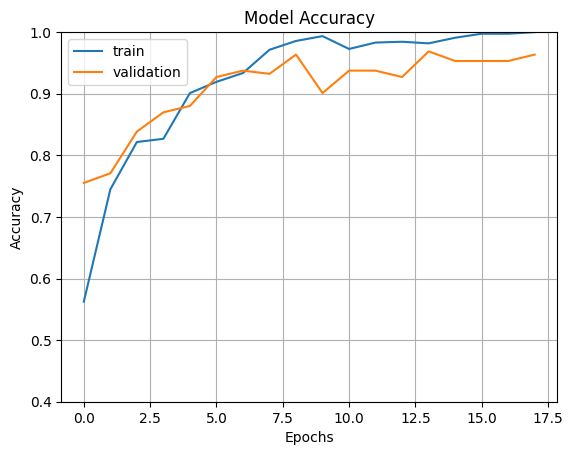

In [43]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

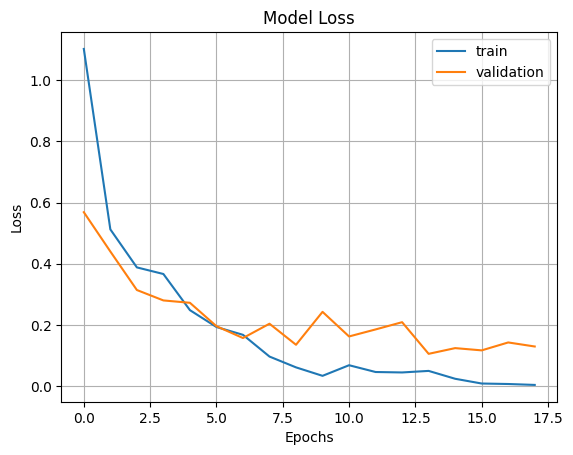

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()